In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from funs import sigmoid, DisplayData, CostFunctionReg, GradientReg, OneVsAll, PredictOneVsAll

##### Loading and visualizing the data

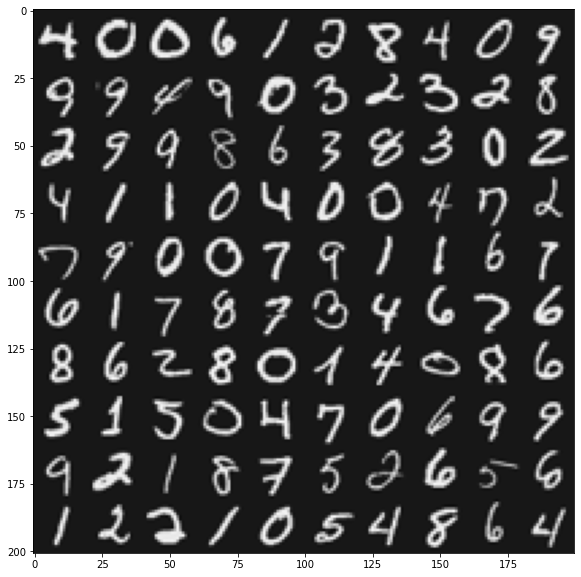

In [2]:
img = loadmat("ex3data1.mat", verify_compressed_data_integrity = True)
img.keys()
x = img.get("X")
y = img.get("y").reshape(-1,1)

DisplayData(x)

###### Test case for regularized cost and gradient functions

In [3]:
theta = np.array([[-2],[-1],[1],[2]])
x_t = np.arange(1,16).reshape(3,5).T/10
x_t = np.hstack((np.ones(x_t.shape[0]).reshape(-1,1), x_t))
y_t = np.array([[1],[0],[1],[0],[1]])
lamda_t = 3;

grads = GradientReg(theta,x_t,y_t,lamda_t).reshape(-1,1)
cost = CostFunctionReg(theta,x_t,y_t,lamda_t)

print(f'\nCost: {float(cost):.6f}');
print('Expected cost: 2.534819\n');
print('Gradients:');
print(f' {grads}\n');
print('Expected gradients:');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Cost: 2.534819
Expected cost: 2.534819

Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]

Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003



##### One-vs-All Training

In [4]:
num_labels = 10
lamda = 0.1
all_theta = OneVsAll(x,y,num_labels,lamda)

##### Predict for One-Vs-All

In [5]:
predictions = PredictOneVsAll(all_theta,x)
print(f'Accuracy achieved : {(predictions == y).mean()*100}%')

Accuracy achieved : 86.52%
